# IRIS DATASET CLUSTERING

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In this study we try to clustering Iris Dataset used Kmeans

Attribute Information:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm
    class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

This dataset has labels and it is normally used for supervised learning tasks, although it is a good option to learn clustering. 



In [6]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

### Dataset import and inspection

In [1]:
from sklearn import datasets

iris = datasets.load_iris() #This is not in df format!

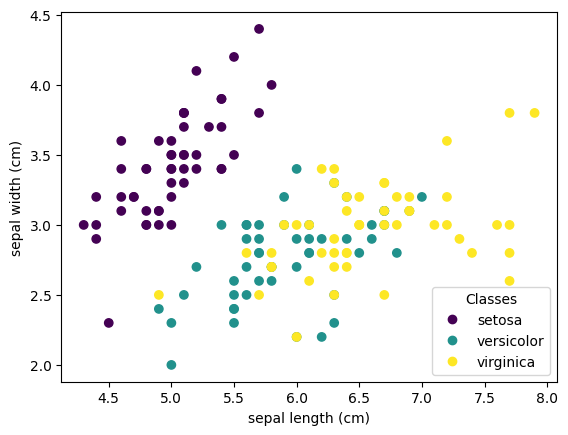

In [5]:
# Scatter plot of the iris dataset

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [9]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [14]:
isnull_number = []
for i in iris_df.columns:
    x = iris_df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = iris_df.columns, columns = ["Total Missing Values"])

,Total Missing Values
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [15]:
unique_number = []
for i in iris_df.columns:
    x = iris_df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = iris_df.columns, columns = ["Total Unique Values"])

,Total Unique Values
sepal length (cm),35
sepal width (cm),23
petal length (cm),43
petal width (cm),22
species,3


In [16]:
iris_outcome = pd.crosstab(index=iris_df["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
setosa,50
versicolor,50
virginica,50


- Distribution plot

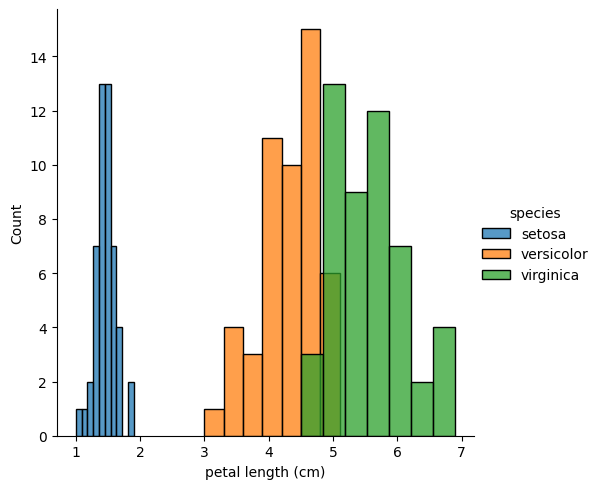

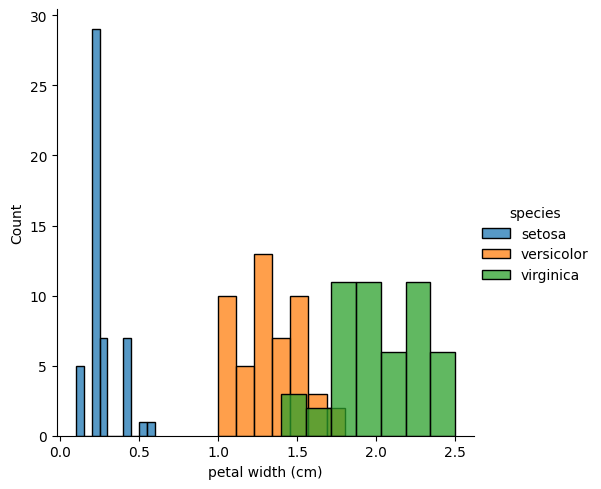

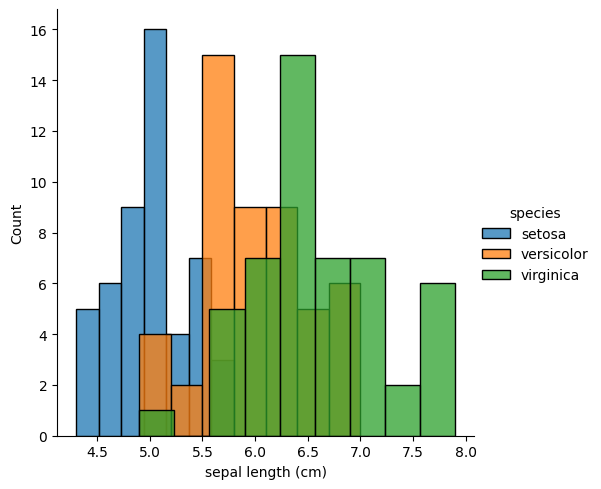

In [23]:
sns.FacetGrid(iris_df, hue="species", height=5).map(sns.histplot, "petal length (cm)").add_legend()
sns.FacetGrid(iris_df, hue="species", height=5).map(sns.histplot, "petal width (cm)").add_legend()
sns.FacetGrid(iris_df, hue="species", height=5).map(sns.histplot, "sepal length (cm)").add_legend()
plt.show()

- Boxplot

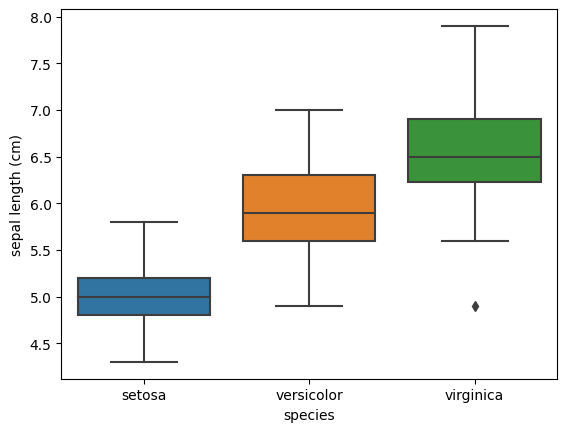

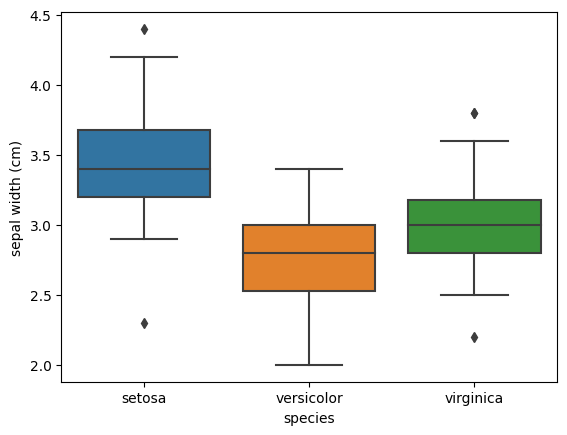

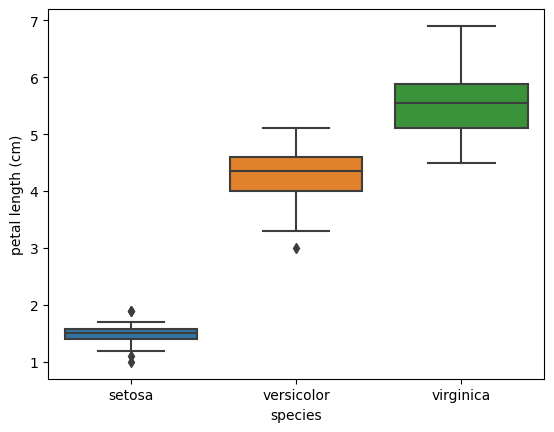

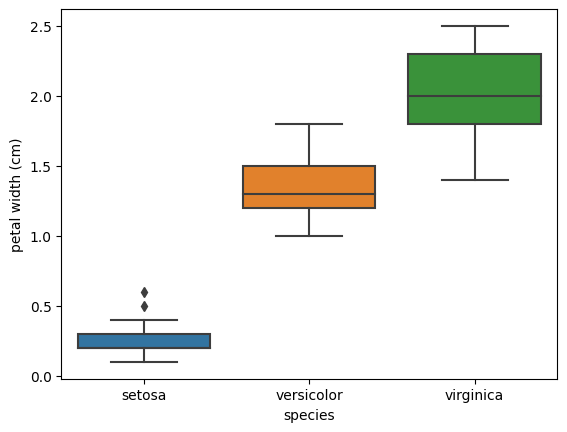

In [28]:
sns.boxplot(x="species",y="sepal length (cm)",data=iris_df)
plt.show()

sns.boxplot(x="species",y="sepal width (cm)",data=iris_df)
plt.show()

sns.boxplot(x="species",y="petal length (cm)",data=iris_df)
plt.show()

sns.boxplot(x="species",y="petal width (cm)",data=iris_df)
plt.show()



- Scatter plot

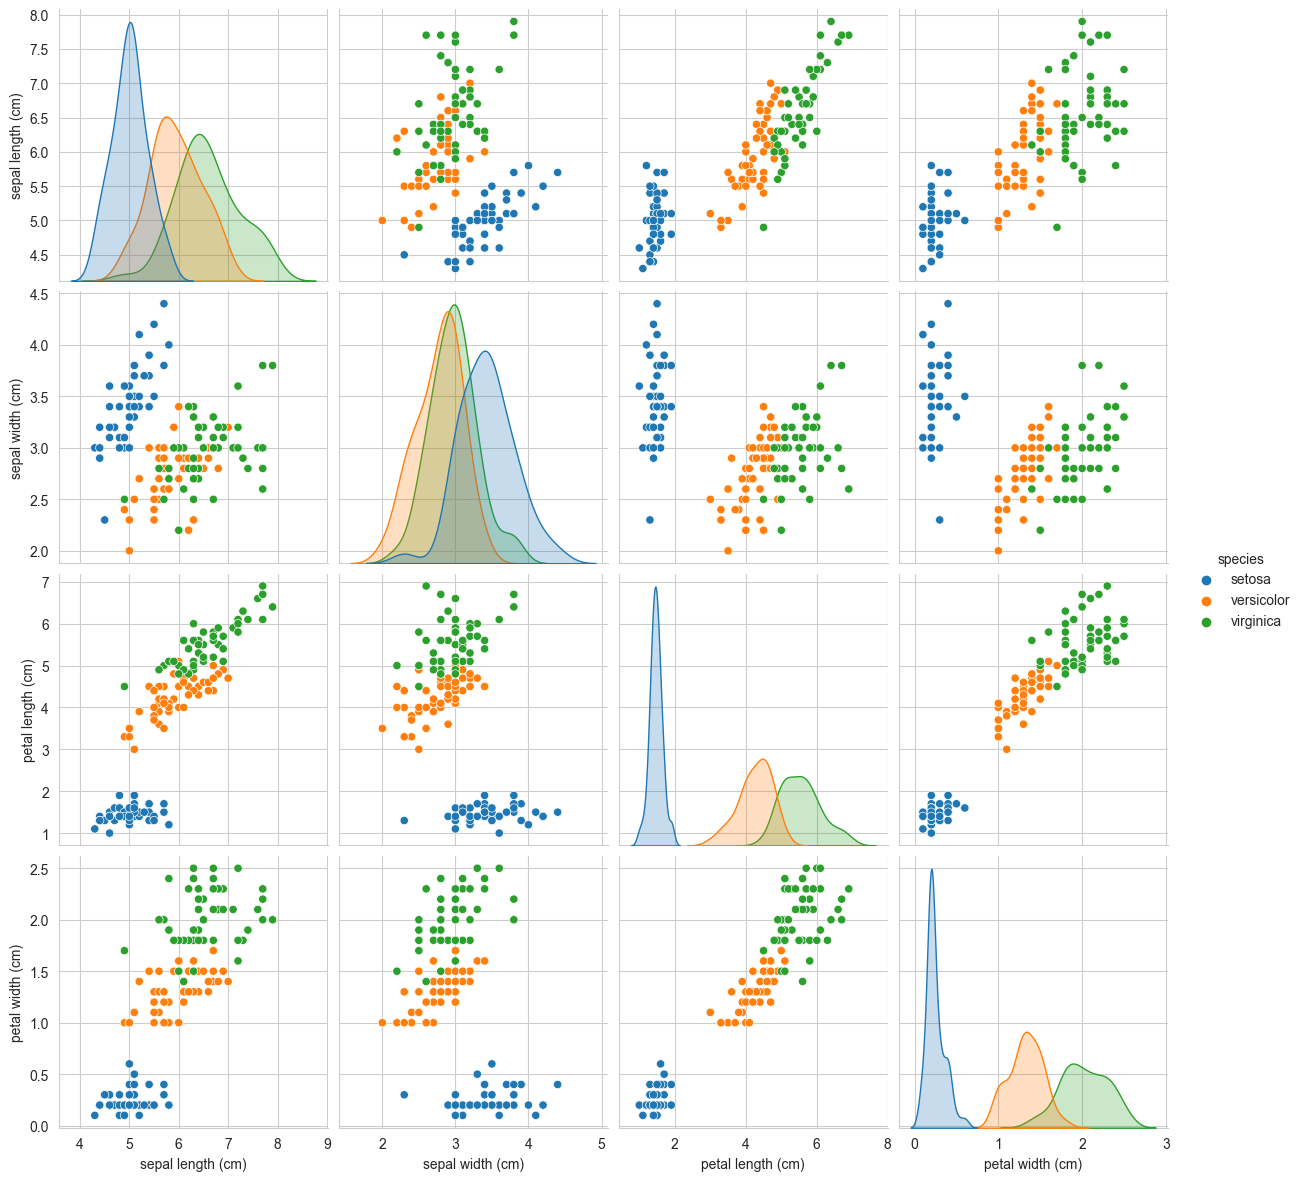

In [30]:
sns.set_style("whitegrid")
sns.pairplot(iris_df,hue="species",height=3);
plt.show()

- On the diagonal, the plot shows the distribution of a single variable for each category (species) of the Iris dataset. This helps in understanding how each species is distributed with respect to each feature (sepal length, sepal width, petal length, petal width).

- Off-Diagonal Plots (Scatter Plots): The off-diagonal plots show the relationships between pairs of variables, again colored by species. This can reveal how the variables correlate with each other for each species and whether any pairs of variables effectively separate the species from each other. For instance, you might observe that petal length and petal width offer a clear distinction between species, indicating these variables are highly discriminative in identifying the species of an Iris flower. The scatter plots can also indicate the type of **relationship** (linear, non-linear, or no apparent relationship) between pairs of features. These plots can also help in identifying any **outliers** within each species based on the distribution and scatter plots. Outliers might appear as points that are far away from the rest of the data points within the same species.

### K-means clustering

C:\Users\Ihona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ihona\AppData\Local\Temp\ipykernel_3852\1843318555.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=colors[clusters], s=50, cmap='viridis')


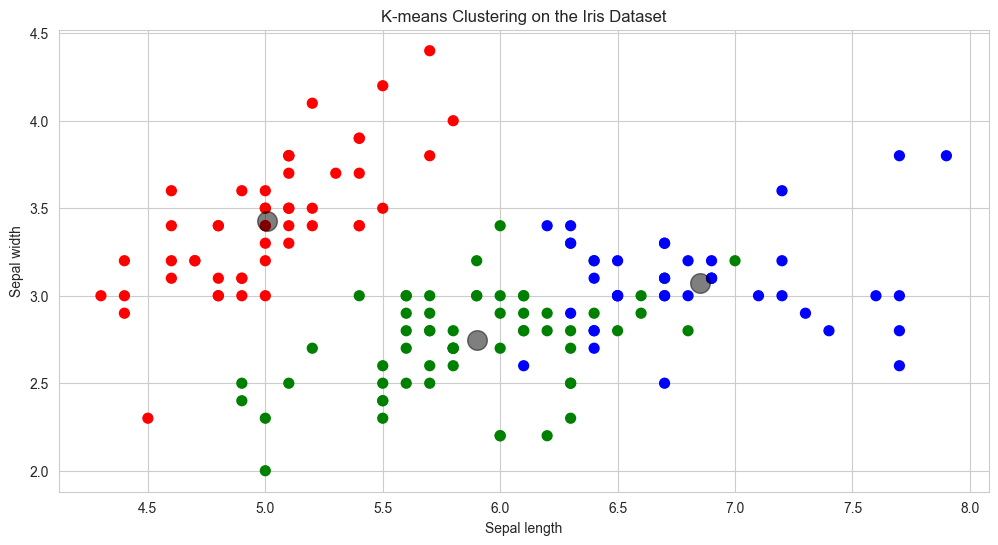

In [51]:
X = iris.data
y = iris.target

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(12, 6))
colors = np.array(['red', 'green', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=colors[clusters], s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('K-means Clustering on the Iris Dataset')
plt.show()

In [52]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.5528190123564095